# Tarea semanal 3
### Alumna: Purpura Salerno, Fiamma
#### Entrega: 19 de mayo del 2022

### Introducción
En el marco de la materia Teoría de los Circuitos 2, a los alumnos se les entrega unos ejercicios para practicar los contenidos aprendidos en clase y reforzar estos mismos. 

### Ejercicio

Se pide que para la siguiete plantilla: 

![Imagen](Plantilla.png)

Siendo $f_{s} = 1000 Hz$, $f_{p} = 3500 Hz$, $\alpha_{max} = 1 dB $ y $\alpha_{min} = 35 dB $. 

Se les pide a los alumnos: 

1. Obtener polos y ceros para máxima planicidad en la banda de paso.
2. Implementar el circuito con estructuras pasivas adaptadas mediante buffers.
3. Utilizando una norma de impedancia ZN = 1K, obtenga el valor de los componentes.
4. Active las bobinas utilizando una estructura con OPAMPs.

Con las siguientes tareas adicionales: 

5. Obtener los valores de la red normalizados en frecuencia e impedancia.
6. Simulación numérica y circuital.
7. Presentación en jupyter notebook

### Punto 1

Para el caso de un pasa bajo, se tienen las siguientes ecuaciones: 

$\epsilon^{2} = 10^{\frac{\alpha_{max}}{10}} - 1$

$\alpha ( \omega_{s} ) = 10 . log ( 1 + \epsilon^{2} * \omega_{s}^{2n} ) $

Como se dijo, estas corresponden a un pasa bajo, mientras que la plantilla que se tiene en la tarea se trata de un pasa altos. Tenemos que los parámetros de un pasa altos y un pasa bajos tienen la siguiente relación: 

| Pasa altos normalizado | Pasa bajos prototipo | 
| --- | --- | 
| $\omega_{p} = 1$ | $\Omega_{p} = \frac{1}{\omega_{p}}=1$ |
| $\omega_{s}$ | $\Omega_{s} = \frac{1}{\omega_{s}}$ |
| $\alpha_{max}$ | $\alpha_{max}$ |
| $\alpha_{min}$ | $\alpha_{min}$ |

Una vez con esta información, obtenemos mediante Python los valores normalizados de $\omega$:

$\epsilon^{2} = 10^{\frac{\alpha_{max}}{10}} - 1 = 0.2589$

Entonces, para calcular el $\alpha ( \omega_{s} )$, previamente se tiene que normalizar $f_{s}$

$\omega_{s n}= \frac{f{s}}{f_{p}} = \frac{1000}{3500} = 0.2857$

Entonces, solo queda sacar los valores de n que cumplan con la plantilla: 

$\alpha ( \omega_{s} )_{n = 1} = 10 . log ( 1 + \epsilon^{2} * \omega_{s n}^{ - 2 * 1} ) = 6.2032 $
$\alpha ( \omega_{s} )_{n = 1} = 10 . log ( 1 + \epsilon^{2} * \omega_{s n}^{ - 2 * 2} ) = 16.0052 $
$\alpha ( \omega_{s} )_{n = 1} = 10 . log ( 1 + \epsilon^{2} * \omega_{s n}^{ - 2 * 3} ) = 26.7858 $
$\alpha ( \omega_{s} )_{n = 1} = 10 . log ( 1 + \epsilon^{2} * \omega_{s n}^{ - 2 * 4} ) = 37.6592 $

Con n = 4 ya se llegó sobre los 35 dB de $\alpha_{min}$ que se pide, y a pesar de que se podría continuar, tomaremos este orden. 

Ya con el orden encontrado, la alumna plantea el siguiente gráfico de ceros y polos, donde la separación de cada polo es de $\frac{\pi}{4}$.

<img src="PolosYCeros.jpeg" style="height:250px"> 




### Punto 6

Obtenemos mediante Python los valores normalizados de $\omega$:

In [3]:
import math as m

w_p = 2 * m.pi * 3.5 * (10 ** 3)
w_s = 2 * m.pi * 1 * (10 ** 3)

w_p_n = 1
w_s_n = w_s / w_p

print(f'w_p_n = {w_p_n}, w_s_n = {w_s_n}')

w_p_n = 1, w_s_n = 0.2857142857142857


Entonces, al realizar la conversión de un filtro pasa altos a uno pasa bajo queda:

In [4]:
w_p_lp = 1 / w_p_n
w_s_lp = 1 / w_s_n

print(f'w_p_lp = {w_p_lp}, w_s_lp = {w_s_lp}')

w_p_lp = 1.0, w_s_lp = 3.5


Teniendo estos valores, queda buscar el orden del filtro. Esto se logra mediante las siguientes lineas de código:

In [18]:
import numpy as np

alpha_max = 1    # dB
alpha_min = 35   # dB

epsilon = 10**(alpha_max/10)-1


print( 'epsilon {:f} '.format(epsilon) )

for nn in range(1,9):
    
    alfa_min_b = 10*np.log10(1 + epsilon * w_s_lp**(2*nn))
    print( 'nn {:d} - alfa_min_mp {:f} '.format(nn, alfa_min_b) )


epsilon 0.258925 
nn 1 - alfa_min_mp 6.203273 
nn 2 - alfa_min_mp 16.004828 
nn 3 - alfa_min_mp 26.784944 
nn 4 - alfa_min_mp 37.657935 
nn 5 - alfa_min_mp 48.538612 
nn 6 - alfa_min_mp 59.419917 
nn 7 - alfa_min_mp 70.301273 
nn 8 - alfa_min_mp 81.182634 


Estos resultados demuestran que a partir de un n = 4 se puede satisfacer la plantilla propuesta.  

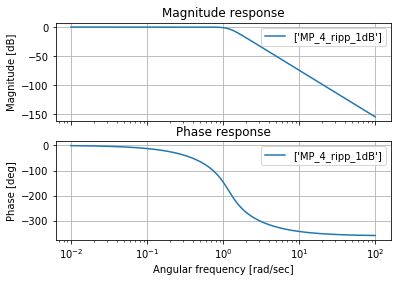

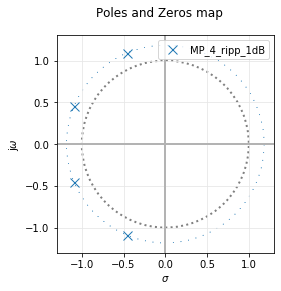

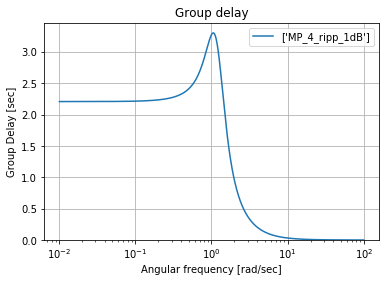

In [15]:
import scipy.signal as sig
from splane import analyze_sys
import matplotlib.pyplot as plt

nn = 4

z,p,k = sig.buttap(nn)

num, den = sig.zpk2tf(z,p,k)
num_mp, den_mp = sig.lp2lp(num, den, epsilon**(-1/2/nn))

all_sys = [sig.TransferFunction(num_mp, den_mp)]

filter_names = ['MP_' + str(nn) + '_ripp_' + str(alpha_max) + 'dB']

plt.close('all')

analyze_sys( all_sys, filter_names)


Mediante estos gráficos, se puede verificar lo dicho previamente. En el gráfico de polos y ceros se puede verificar lo supuesto por la estudiante y en el de módulo, que en 1 el valor es de 1dB y en 3.5 el valor es aproximadamente 37.6. 